## AutoRegressive Model
* Japan population data
* from 2000-10-01 to 2020-09-01
https://www.stat.go.jp/english/data/jinsui/2.html

In [34]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import ar_select_order, AutoReg
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                 


In [22]:
df = pd.read_csv('Data/JapanPopulation2000.10_2020_9.csv', index_col='Month', parse_dates=True, skiprows=[1,2,3])
df.index.freq = 'MS'
df.head()

,PopEst
Month,
2001-01-01,125643
2001-02-01,125727
2001-03-01,125651
2001-04-01,125722
2001-05-01,125665


<Axes: xlabel='Month'>

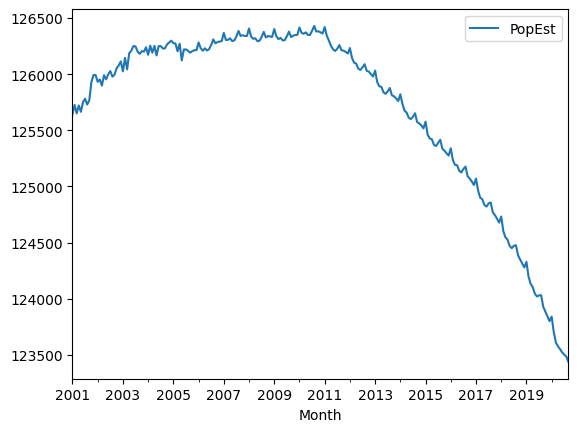

In [20]:
df.plot()


<Axes: xlabel='DATE'>

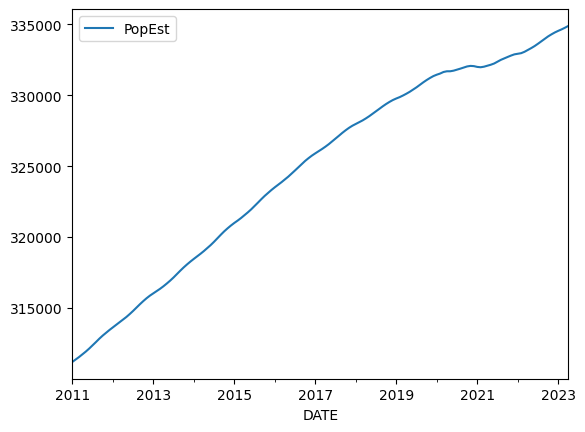

In [89]:

# US population

In [23]:
len(df)

237

In [25]:
# train data up to 2019
# test data 2019 and 9 months of 2020
end_train = len(df)-(12*1+9)
train_data = df.iloc[:end_train]
test_data = df.iloc[end_train:]

In [30]:
print(train_data.tail())
print(test_data.head())

            PopEst
Month             
2018-08-01  124477
2018-09-01  124387
2018-10-01  124349
2018-11-01  124315
2018-12-01  124279
            PopEst
Month             
2019-01-01  124329
2019-02-01  124196
2019-03-01  124133
2019-04-01  124103
2019-05-01  124045


### Check data for stationarity

In [33]:
stepwise_fit = auto_arima(df['PopEst'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=12,
                          seasonal=True,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=2476.767, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=2712.831, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=2378.452, Time=0.13 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=2387.086, Time=0.15 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=2637.860, Time=0.03 sec
 ARIMA(1,2,0)(2,0,0)[12]             : AIC=2380.231, Time=0.31 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=2380.023, Time=0.24 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=2474.957, Time=0.31 sec
 ARIMA(1,2,0)(2,0,1)[12]             : AIC=inf, Time=1.40 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=2476.103, Time=0.03 sec
 ARIMA(2,2,0)(1,0,0)[12]             : AIC=2353.629, Time=0.13 sec
 ARIMA(2,2,0)(0,0,0)[12]             : AIC=2606.998, Time=0.04 sec
 ARIMA(2,2,0)(2,0,0)[12]             : AIC=2355.624, Time=0.34 sec
 ARIMA(2,2,0)(1,0,1)[12]             : AIC=2355.621, Time=0.25 sec
 ARIMA(2,2,0)(0,0,1)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  237
Model:             SARIMAX(4, 2, 1)x(1, 0, [1, 2], 12)   Log Likelihood               -1137.039
Date:                                 Fri, 16 Jun 2023   AIC                           2292.077
Time:                                         10:25:59   BIC                           2323.213
Sample:                                     01-01-2001   HQIC                          2304.630
                                          - 09-01-2020                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1496      0.045     -3.341      0.001      -0.237      -0.062
ar.L2          0.0152      0.048      0.316      0.752      -0.079       0.109
ar.L3         -0.0600      0.049     -1.234      0.217      -0.155       0.035
ar.L4         -0.0225      0.042     -0.538      0.590      -0.104       0.059
ma.L1         -0.9624      0.013    -75.049      0.000      -0.988      -0.937
ar.S.L12       0.8790      0.034     25.546      0.000       0.812       0.946
ma.S.L12      -0.1275      0.060     -2.140      0.032      -0.244      -0.011
ma.S.L24      -0.2404      0.065     -3.680      0.000      -0.368      -0.112
sigma2       557.7217     30.465     18.307      0.000     498.012     617.432
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):               582.04
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                            -0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Decompose data using ETS

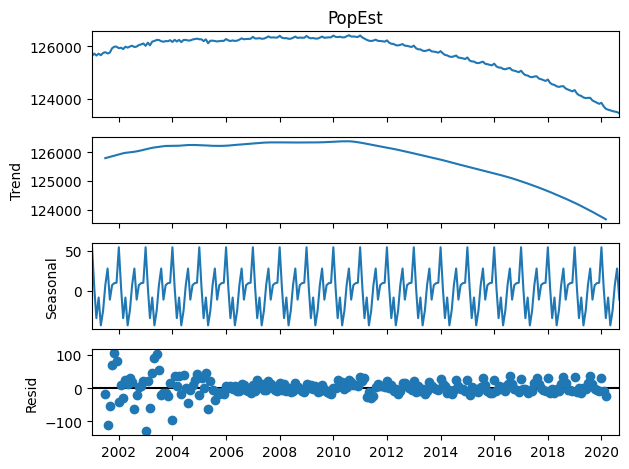

In [37]:
result = seasonal_decompose(df['PopEst'], model='add')
result.plot();

### Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot more combinations to evaluate.

In [39]:
# For SARIMA Orders we set seasonal=True and pass in an m value
auto_arima(df['PopEst'],seasonal=True,m=12).summary()
# SARIMAX(4, 2, 1)x(1, 0, [1, 2], 12)
# SARIMAX(1, 2, 1)x(1, 0, [], 12)	

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  237
Model:             SARIMAX(1, 2, 1)x(1, 0, [], 12)   Log Likelihood               -1141.803
Date:                             Fri, 16 Jun 2023   AIC                           2291.607
Time:                                     10:31:02   BIC                           2305.445
Sample:                                 01-01-2001   HQIC                          2297.186
                                      - 09-01-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1256      0.027     -4.710      0.000      -0.178      -0.073
ma.L1         -0.9657      0.012    -82.025      0.000      -0.989      -0.943
ar.S.L12       0.7641      0.015     51.799      0.000       0.735       0.793
sigma2       576.6666     27.173     21.222      0.000     523.409     629.924
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               621.94
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.11   Skew:                            -1.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Fit a SARIMAX(1, 2, 1)x(1, 0, [], 12) Model

In [72]:
model = SARIMAX(train_data['PopEst'],order=(1,2,1),seasonal_order=(1,0,[],12))
# model = SARIMAX(train_data['PopEst'],order=(4, 2, 1),seasonal_order=(1, 0, [1, 2], 12))
results = model.fit()
results.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60592D+00    |proj g|=  7.62935D-01

At iterate    5    f=  5.21678D+00    |proj g|=  1.34107D-02

At iterate   10    f=  5.05837D+00    |proj g|=  4.12524D-01

At iterate   15    f=  4.88500D+00    |proj g|=  9.65128D-03

At iterate   20    f=  4.88487D+00    |proj g|=  1.90491D-03



At iterate   25    f=  4.86701D+00    |proj g|=  2.98406D-02

At iterate   30    f=  4.85821D+00    |proj g|=  1.03622D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     49      1     0     0   9.393D-06   4.858D+00
  F =   4.8582071625302614     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              PopEst   No. Observations:                  216
Model:             SARIMAX(1, 2, 1)x(1, 0, [], 12)   Log Likelihood               -1049.373
Date:                             Fri, 16 Jun 2023   AIC                           2106.745
Time:                                     10:48:22   BIC                           2120.209
Sample:                                 01-01-2001   HQIC                          2112.186
                                      - 12-01-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1278      0.027     -4.689      0.000      -0.181      -0.074
ma.L1         -0.9656      0.013    -77.038      0.000      -0.990      -0.941
ar.S.L12       0.7493      0.016     47.124      0.000       0.718       0.780
sigma2       604.7517     30.220     20.011      0.000     545.521     663.982
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               554.64
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                            -1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
# Obtain predicted values
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX(1, 2, 1)x(1, 0, [], 12) Predictions')

/jupyter/notebooks/.venvs/tensor_venv/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


#### store the start and end of test data index


In [74]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test_data['PopEst'][i]}")

predicted=124310.0486, expected=124329
predicted=124203.1843, expected=124196
predicted=124152.5215, expected=124133
predicted=124127.3333, expected=124103
predicted=124076.6698, expected=124045
predicted=124051.4817, expected=124020
predicted=124057.7631, expected=124030
predicted=124052.8053, expected=124031
predicted=123975.9172, expected=123928
predicted=123937.9914, expected=123886
predicted=123903.0627, expected=123843
predicted=123866.6355, expected=123800
predicted=123880.446 , expected=123840
predicted=123790.9219, expected=123703
predicted=123743.5082, expected=123610
predicted=123715.1819, expected=123575
predicted=123667.7677, expected=123551
predicted=123639.4415, expected=123521
predicted=123634.6946, expected=123503
predicted=123621.5266, expected=123484
predicted=123554.4629, expected=123437


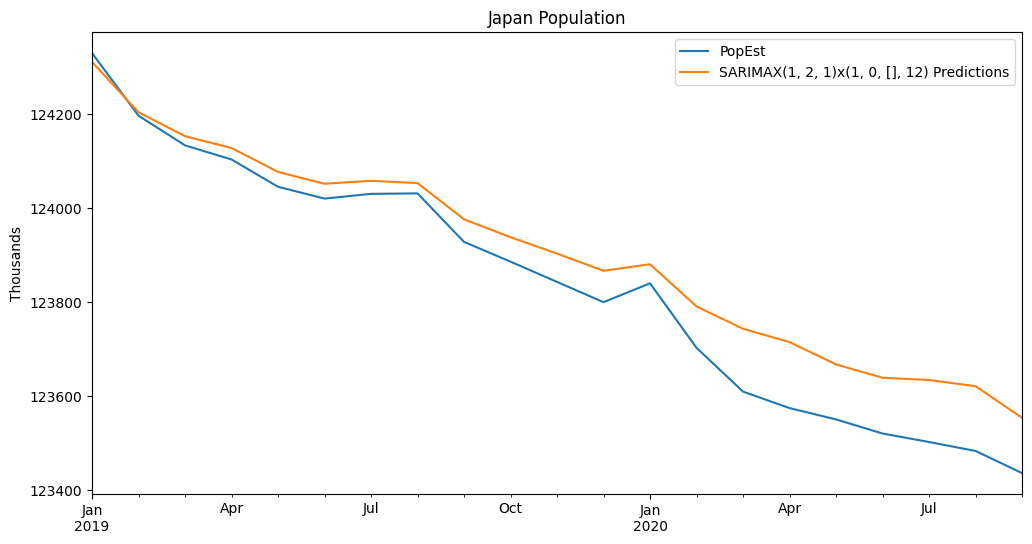

In [75]:
# Plot predictions against known values
title = 'Japan Population'
ylabel='Thousands'
xlabel=''

ax = test_data['PopEst'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

#### Evaluate the model

In [76]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test_data['PopEst'], predictions)
print(f'SARIMAX(1, 2, 1)x(1, 0, [], 12) MSE Error: {error:11.10}')

SARIMAX(1, 2, 1)x(1, 0, [], 12) MSE Error:  6772.88026


In [77]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test_data['PopEst'], predictions)
print(f'SARIMAX(1, 2, 1)x(1, 0, [], 12) RMSE Error: {error:11.10}')

SARIMAX(1, 2, 1)x(1, 0, [], 12) RMSE Error: 82.29751066


### Retrain the model on the whole data

In [78]:
model = SARIMAX(df['PopEst'],order=(1, 2, 1),seasonal_order=(1, 0, [], 12))
results = model.fit()
fcast = results.predict(len(df),len(df)+(12*5),typ='levels').rename('SARIMA(1, 2, 1)x(1, 0, [], 12) Forecast');

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56722D+00    |proj g|=  7.00650D-01

At iterate    5    f=  5.20527D+00    |proj g|=  1.37588D-02

At iterate   10    f=  5.09356D+00    |proj g|=  4.58136D-01

At iterate   15    f=  4.84868D+00    |proj g|=  5.58810D-03

At iterate   20    f=  4.84783D+00    |proj g|=  2.01395D-02


 This problem is unconstrained.



At iterate   25    f=  4.81973D+00    |proj g|=  3.32022D-02

At iterate   30    f=  4.81774D+00    |proj g|=  4.03187D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     42      1     0     0   4.475D-06   4.818D+00
  F =   4.8177361781417627     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/jupyter/notebooks/.venvs/tensor_venv/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


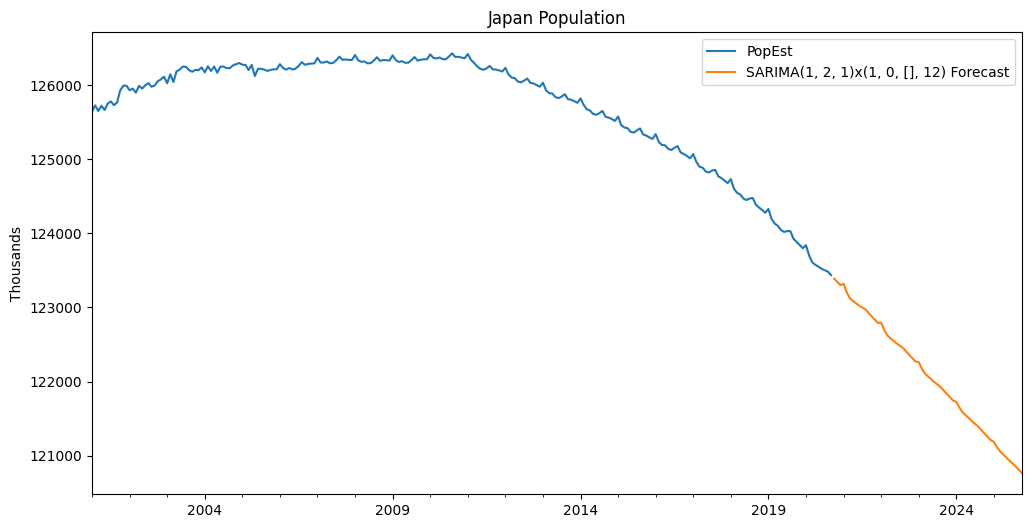

In [79]:
# Plot predictions against known values
title = 'Japan Population'
ylabel='Thousands'
xlabel=''

ax = df['PopEst'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);